In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
table1_df = pd.read_csv("table1.csv")
table2_df = pd.read_csv("table2.csv")

In [3]:
table1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State/Union Territory  32 non-null     object 
 1   2004-05                31 non-null     float64
 2   2005-06                31 non-null     float64
 3   2006-07                31 non-null     float64
 4   2007-08                31 non-null     float64
 5   2008-09                31 non-null     float64
 6   2009-10                31 non-null     float64
 7   2010-11                32 non-null     float64
 8   2011-12                32 non-null     float64
 9   2012-13                32 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.6+ KB


In [4]:
table2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State/Union Territory  32 non-null     object 
 1   2013-14                32 non-null     float64
 2   2014-15                32 non-null     float64
 3   2015-16                32 non-null     float64
 4   2016-17                32 non-null     float64
 5   2017-18                32 non-null     float64
 6   2018-19                32 non-null     float64
 7   2019-20                32 non-null     float64
 8   2020-21                32 non-null     float64
 9   2021-22                32 non-null     float64
 10  2022-23*               32 non-null     object 
dtypes: float64(9), object(2)
memory usage: 2.9+ KB


In [5]:
table1_df.head()

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13
0,Andhra Pradesh,9601.0,11704.0,11872.0,13324.0,14241.0,10538.0,7882.4,7746.2,6862.4
1,Arunachal Pradesh,135.0,146.2,146.2,158.1,163.9,215.8,234.0,255.0,263.0
2,Assam,3470.7,3552.5,2916.0,3319.0,4008.5,4335.9,4736.6,4516.3,5128.5
3,Bihar,2472.2,3495.5,4989.3,4418.1,5590.3,3599.3,3102.1,7162.6,7529.3
4,Chhattisgarh,4383.3,5011.6,5041.4,5426.6,4391.8,4110.4,6159.0,6028.4,6608.8


In [6]:
table2_df.head()

,State/Union Territory,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23*
0,Andhra Pradesh,6969.7,7233.9,7488.7,7452.4,8166.2,8234.7,8658.9,7882.9,7763.6,8542.3
1,Arunachal Pradesh,276.2,285.0,204.0,220.0,233.3,240.0,244.7,247.1,252.4,-
2,Assam,4927.1,5222.7,5125.1,4727.4,5283.7,5220.6,4984.6,5214.8,4382.1,4979.8
3,Bihar,5505.8,6356.7,6802.2,8239.3,8093.1,6155.5,6298.0,6747.0,7717.0,6725.2
4,Chhattisgarh,6716.4,6322.1,5789.4,8048.4,4930.8,6526.9,6774.8,7161.2,8021.7,8238.3


In [7]:
table1_df.isnull().sum()

State/Union Territory    0
2004-05                  1
2005-06                  1
2006-07                  1
2007-08                  1
2008-09                  1
2009-10                  1
2010-11                  0
2011-12                  0
2012-13                  0
dtype: int64

In [8]:
table2_df.isnull().sum()

State/Union Territory    0
2013-14                  0
2014-15                  0
2015-16                  0
2016-17                  0
2017-18                  0
2018-19                  0
2019-20                  0
2020-21                  0
2021-22                  0
2022-23*                 0
dtype: int64

In [9]:
# Concatenateing both tables into a single DataFrame
full_df = pd.concat([table1_df, table2_df.drop(columns=['State/Union Territory'])], axis=1)


In [10]:
# Droping the last row containing all-over rice production
full_df = full_df[:-1]


In [11]:
# Transpose the DataFrame to have years as rows and states as columns
full_df = full_df.transpose()


In [12]:
# Extracting the states/union territories as column names
full_df.columns = full_df.iloc[0]
full_df = full_df[1:]


In [13]:
# Selecting only numeric columns
numeric_df = full_df.apply(pd.to_numeric, errors='coerce')
numeric_df = numeric_df.dropna(axis=1)
numeric_df_filled = numeric_df.fillna(numeric_df.mean())

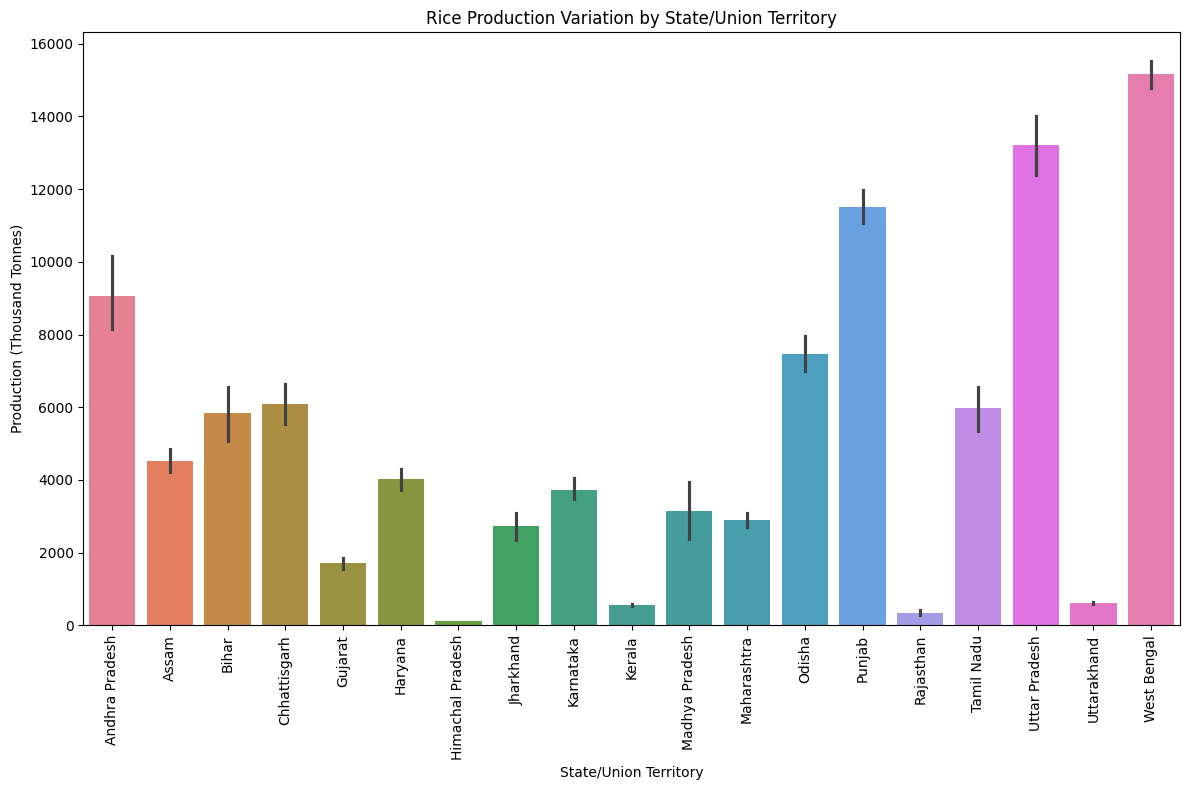

In [14]:
# Visualize rice production variation using bar charts
plt.figure(figsize=(12, 8))
sns.barplot(data=numeric_df)
plt.title('Rice Production Variation by State/Union Territory')
plt.xlabel('State/Union Territory')
plt.ylabel('Production (Thousand Tonnes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


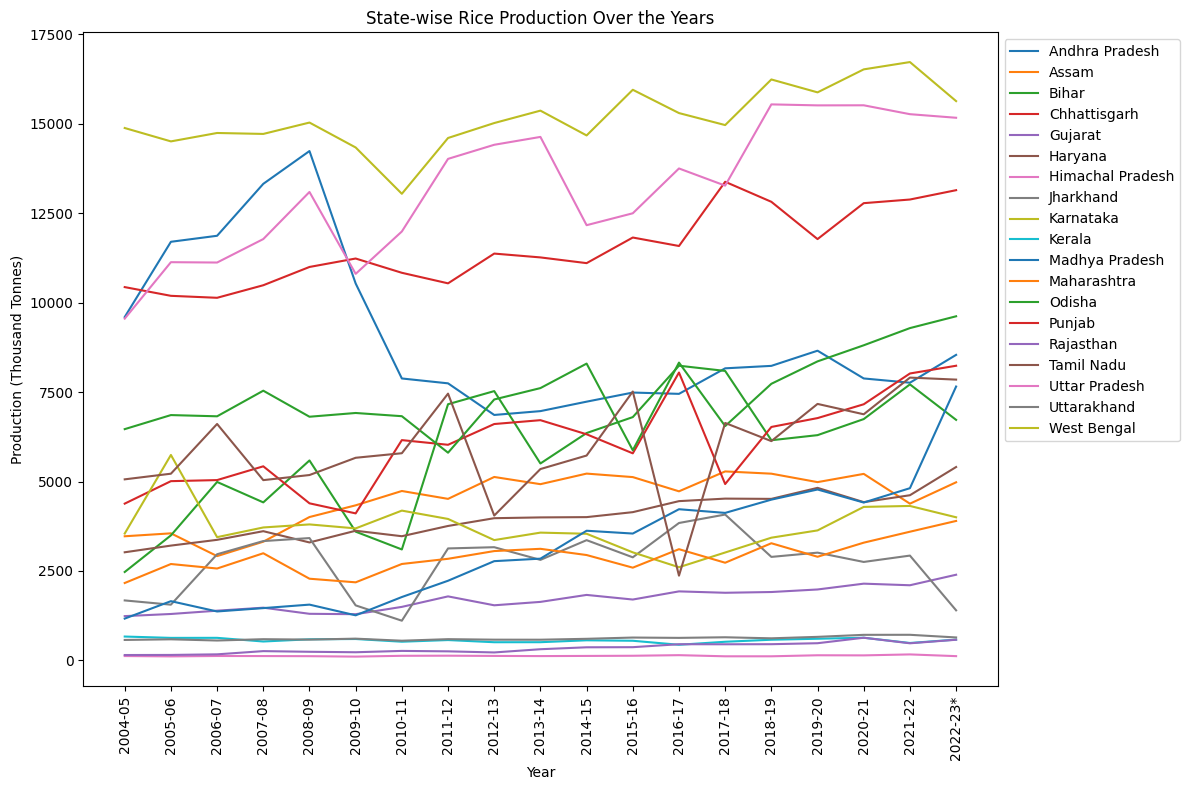

In [15]:
# Analyze state-wise rate of production using line plots
plt.figure(figsize=(12, 8))
for state in numeric_df.columns:
    plt.plot(numeric_df.index, numeric_df[state], label=state)
plt.title('State-wise Rice Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Thousand Tonnes)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-16-083a6f7f2b4c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_production_sorted.index, y=mean_production_sorted.values, palette='viridis')


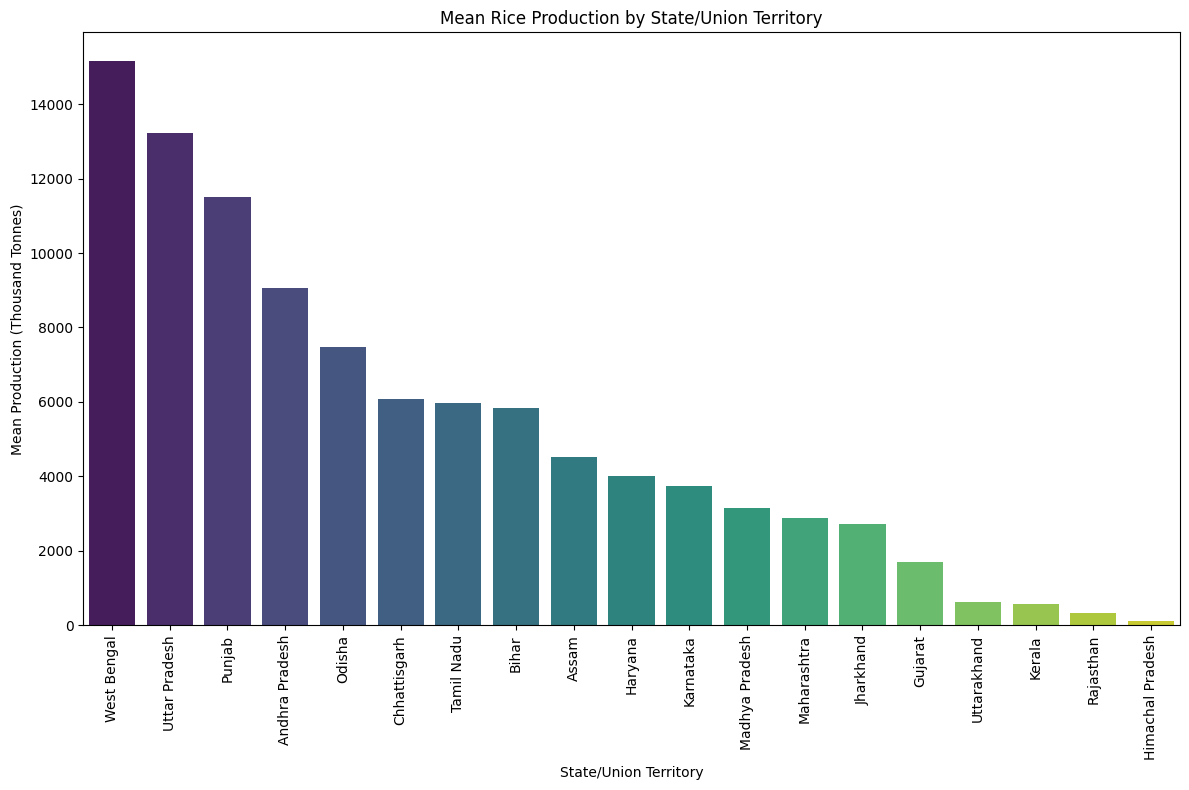

In [16]:

# Analyzeing trends and patterns in rice production across different states
# Calculateing the mean production for each state/union territory
mean_production = numeric_df.mean()

# Sorting states by mean production in descending order
mean_production_sorted = mean_production.sort_values(ascending=False)

# Visualizeing mean production across different states
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_production_sorted.index, y=mean_production_sorted.values, palette='viridis')
plt.title('Mean Rice Production by State/Union Territory')
plt.xlabel('State/Union Territory')
plt.ylabel('Mean Production (Thousand Tonnes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-17-075236270944>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_production_change_sorted.index, y=total_production_change_sorted.values, palette='magma')


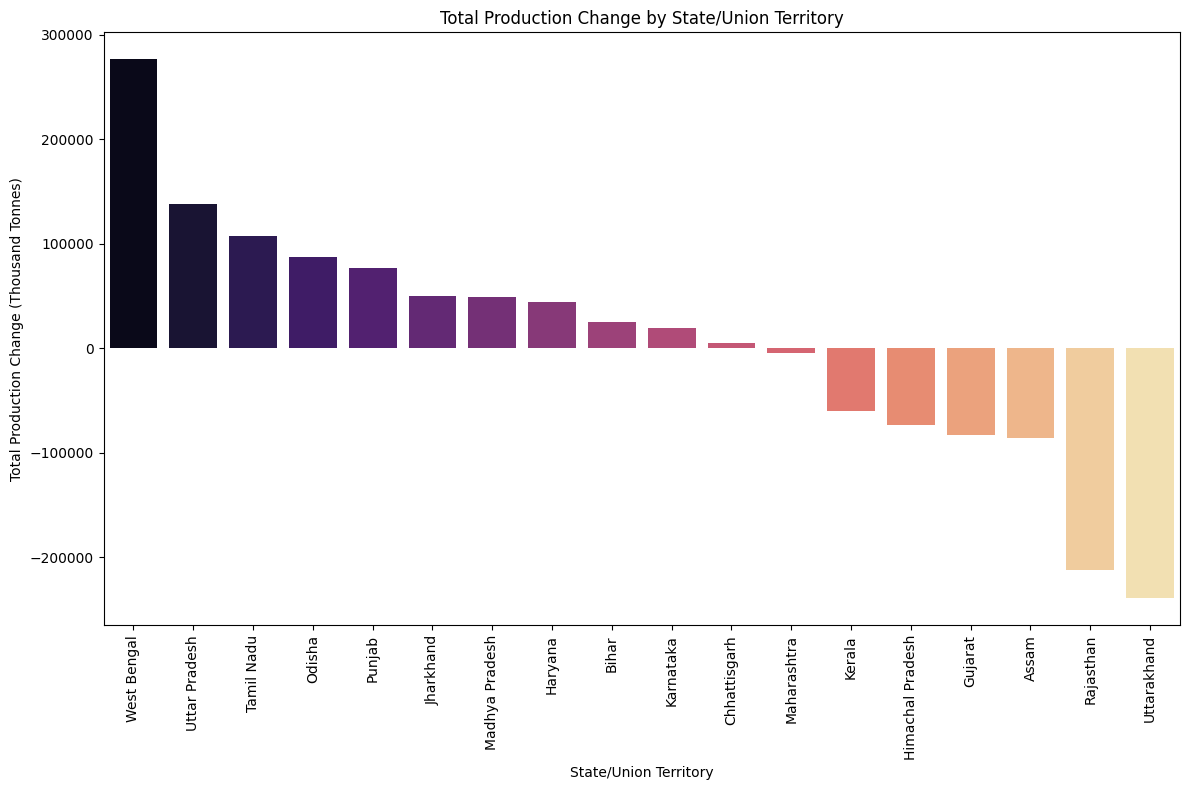

In [17]:
# Identifying provinces that need improvement in rice production
# Calculateing the production change over the years for each state/union territory
production_change = numeric_df.diff(axis=1).iloc[:, 1:]

# Calculateing the total production change for each state/union territory
total_production_change = production_change.sum()

# Sorting states by total production change in descending order
total_production_change_sorted = total_production_change.sort_values(ascending=False)

# Visualizeing total production change across different states
plt.figure(figsize=(12, 8))
sns.barplot(x=total_production_change_sorted.index, y=total_production_change_sorted.values, palette='magma')
plt.title('Total Production Change by State/Union Territory')
plt.xlabel('State/Union Territory')
plt.ylabel('Total Production Change (Thousand Tonnes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-18-43a0ff5613d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_df.index, y='Average Production', data=numeric_df, palette='coolwarm')


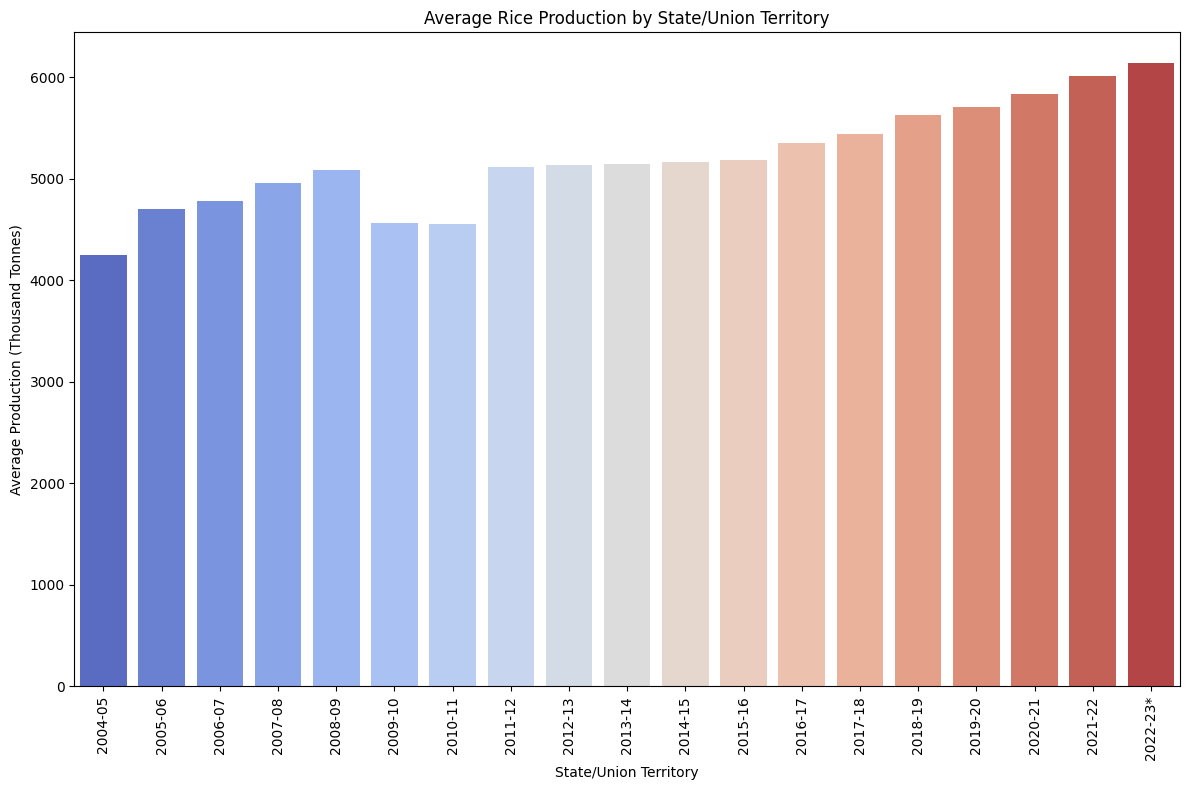

In [18]:
# Extracting additional features from the dataset
average_production = numeric_df.mean(axis=1)

# Adding the average production as a new feature to the dataset
numeric_df['Average Production'] = average_production

# Visualizeing the average production across different states
plt.figure(figsize=(12, 8))
sns.barplot(x=numeric_df.index, y='Average Production', data=numeric_df, palette='coolwarm')
plt.title('Average Rice Production by State/Union Territory')
plt.xlabel('State/Union Territory')
plt.ylabel('Average Production (Thousand Tonnes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [19]:
# Converting DataFrame to numpy array
data = numeric_df_filled.values.astype(float)

In [20]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [21]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [22]:
# sequence length (number of years to look back)
seq_length = 5

X, y = create_sequences(data_normalized, seq_length)

In [23]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:

time_steps = X_train.shape[1]
features = X_train.shape[2]

#LSTM model
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(time_steps, features)))
model.add(LSTM(units=32))
model.add(Dense(units=features))
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3637 - val_loss: 0.3696
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 0.3520 - val_loss: 0.3588
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 0.3409 - val_loss: 0.3484
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 0.3301 - val_loss: 0.3383
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 0.3195 - val_loss: 0.3282
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 0.3091 - val_loss: 0.3183
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2988 - val_loss: 0.3083
Epoch 8/100
1/1 [==============================] - 0s 58ms/step - loss: 0.2884 - val_loss: 0.2983
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2780 - val_loss: 0.2881
Epoch 10/100
1/1 [==============================] - 0s 39ms/step - loss: 0.2674 - val_loss: 0.2778
Epoch 11/100
1/1 [===

In [27]:
# Testinging the model on the test data
predicted_data_normalized = model.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data_normalized)

1/1 [==============================] - 1s 1s/step


In [28]:
# Adjustinging the shape of predicted_data
predicted_data = np.concatenate((predicted_data, np.zeros((predicted_data.shape[0], 1))), axis=1)

# Creatinging DataFrame for predicted production on the test data
predicted_production_test = pd.DataFrame(predicted_data, columns=numeric_df.columns)
predicted_production_test


State/Union Territory,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Odisha,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttarakhand,West Bengal,Average Production
0,7934.958496,4944.426270,7329.514648,6929.690918,2000.661865,4644.964844,135.427994,3111.397461,3457.417725,529.584045,4861.936035,3164.580566,8110.742188,12388.670898,453.566895,6480.287598,14408.044922,650.922485,15702.159180,0.0
1,8457.901367,4823.159668,7591.636230,7088.100098,2115.498779,4951.302246,139.500107,2969.076660,3743.998535,546.853333,5624.632812,3330.350342,8528.327148,12436.749023,515.002380,6800.122559,14439.626953,666.601318,15969.230469,0.0
2,7070.844727,4665.211914,5131.304688,6145.343262,1574.123291,3599.216064,123.689003,2323.330078,3872.098877,531.940491,1513.056030,2844.370605,6716.738281,10566.735352,257.361877,5503.289551,12914.448242,557.654480,14055.013672,0.0


In [29]:
predicted_data_normalized = model.predict(np.array([data_normalized[-seq_length:]]))
predicted_data = scaler.inverse_transform(predicted_data_normalized)

1/1 [==============================] - 0s 32ms/step


In [30]:
numeric_df = numeric_df.iloc[:, :predicted_data.shape[1]]
predicted_production = pd.DataFrame(predicted_data, columns=numeric_df.columns)
print("Predicted Production for the Next 5 Years:")
predicted_production

Predicted Production for the Next 5 Years:


State/Union Territory,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Odisha,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttarakhand,West Bengal
0,8770.530273,4924.535156,8019.432129,7357.56543,2238.484131,5223.689941,145.493134,2942.600586,3970.667725,566.847229,6091.269531,3434.671143,9023.390625,12611.324219,573.956665,7166.397949,14488.455078,674.371704,16273.59668


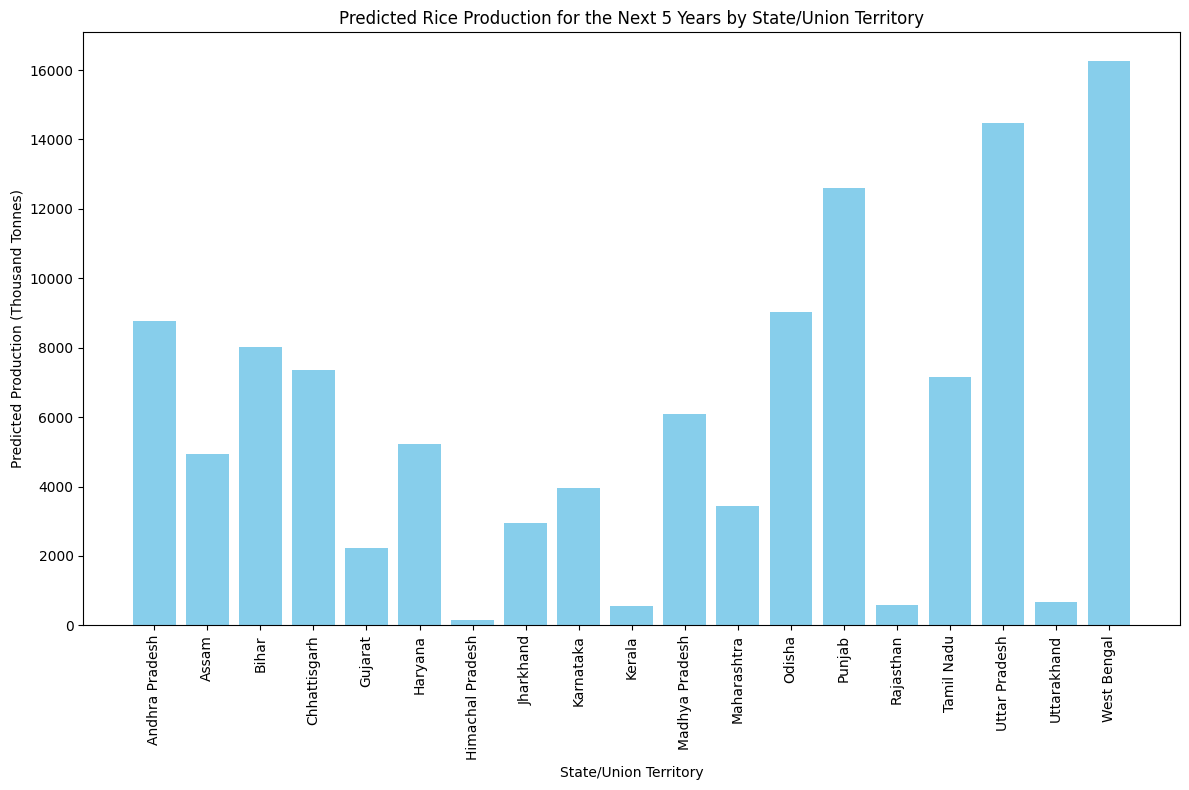

In [31]:
states = predicted_production.columns
predicted_values = predicted_production.values[0]

plt.figure(figsize=(12, 8))
plt.bar(states, predicted_values, color='skyblue')
plt.title('Predicted Rice Production for the Next 5 Years by State/Union Territory')
plt.xlabel('State/Union Territory')
plt.ylabel('Predicted Production (Thousand Tonnes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [52]:
# Modify sequence length for predicting one year ahead
seq_length = 5  # Keep the sequence length as 5 for better context

# Initialize list to store predicted production for the next 5 years
predicted_production_years = []

# Copy the last seq_length years of normalized data to initialize prediction
data_normalized_pred = data_normalized[-seq_length:]

# Iterate over 5 years to forecast production for each year
for _ in range(5):
    # Predict production for the next year
    predicted_data_normalized = model.predict(np.array([data_normalized_pred]))
    predicted_data = scaler.inverse_transform(predicted_data_normalized)

    # Append predicted production for the next year to the list
    predicted_production_years.append(predicted_data.flatten())

    # Update data for the next prediction by appending the predicted production
    data_normalized_pred = np.concatenate((data_normalized_pred[1:], predicted_data_normalized), axis=0)

# Convert list of predicted production for each year into a DataFrame
predicted_production_df = pd.DataFrame(predicted_production_years, columns=numeric_df.columns)

# Display the predicted production for the next 5 years
print("Predicted Production for the Next 5 Years:")
predicted_production_df


1/1 [==============================] - 0s 84ms/step
Predicted Production for the Next 5 Years:


State/Union Territory,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Odisha,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttarakhand,West Bengal
0,7276.146973,3491.076904,3490.744141,4801.802246,1387.780884,3240.524170,111.645935,1725.868774,2894.900879,462.850128,1903.743164,2394.557129,6186.597656,10637.839844,206.053421,3396.244385,10770.767578,562.106750,13606.111328
1,7281.678223,3535.446289,3583.674316,4857.801758,1396.341064,3267.628418,111.857040,1757.838989,2912.974121,463.525269,1931.356323,2408.782227,6214.078125,10666.478516,209.246277,3464.000977,10858.104492,563.975830,13641.061523
2,7293.717773,3615.521484,3751.638916,4958.179199,1413.739746,3317.702393,112.376740,1825.439087,2941.139648,465.029572,2010.654663,2437.428955,6262.833008,10727.387695,216.162521,3587.613770,11027.149414,567.485657,13713.666016
3,7311.802246,3730.045166,3993.435303,5102.186035,1440.824951,3392.011475,113.295708,1932.160156,2976.486328,467.660126,2158.047607,2481.830566,6334.928711,10825.251953,227.481003,3765.818115,11287.256836,572.756287,13829.534180
4,7337.420898,3879.455566,4316.448242,5292.067383,1479.641968,3494.571289,114.719887,2081.436523,3017.973633,471.707275,2386.917480,2544.372314,6437.907715,10965.932617,244.101059,4003.453857,11650.477539,580.031372,13994.621094


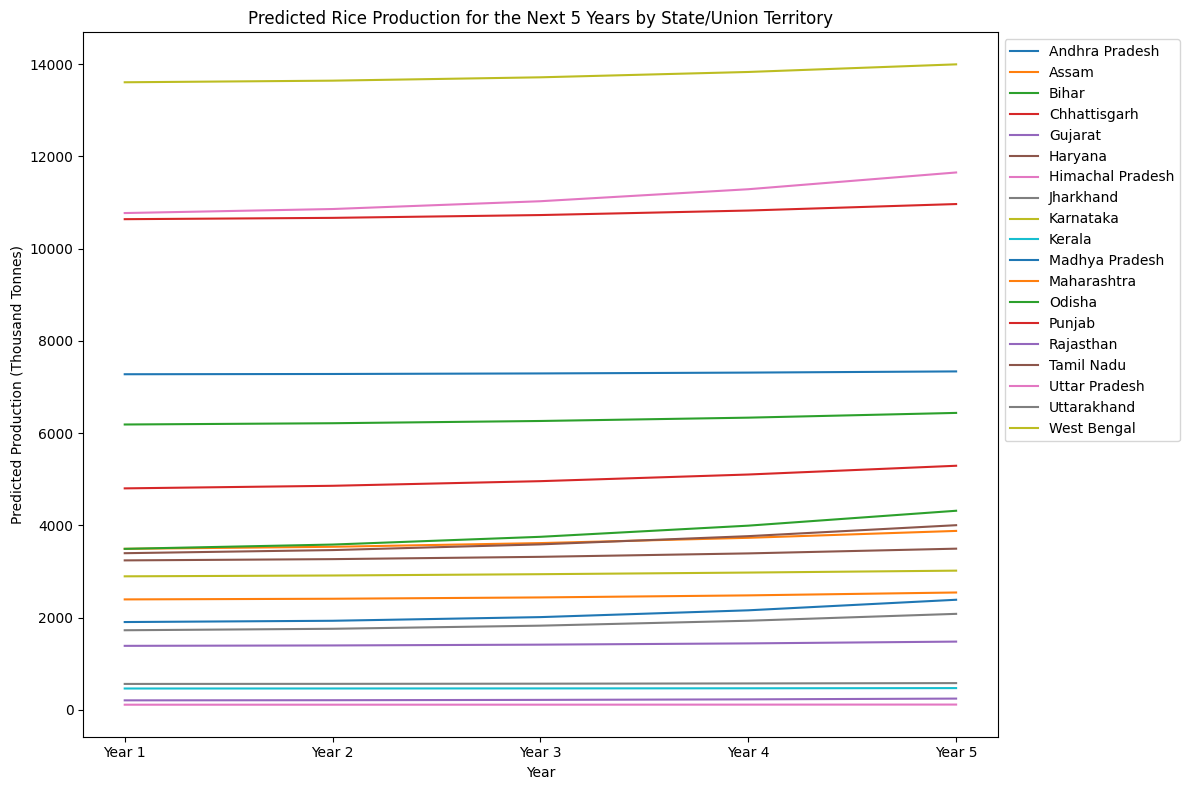

In [53]:
# Plotting the predicted production for the next 5 years
plt.figure(figsize=(12, 8))
for state in predicted_production_df.columns:
    plt.plot(predicted_production_df.index, predicted_production_df[state], label=state)

plt.title('Predicted Rice Production for the Next 5 Years by State/Union Territory')
plt.xlabel('Year')
plt.ylabel('Predicted Production (Thousand Tonnes)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(len(predicted_production_df.index)), [f'Year {i+1}' for i in range(len(predicted_production_df.index))])
plt.tight_layout()
plt.show()


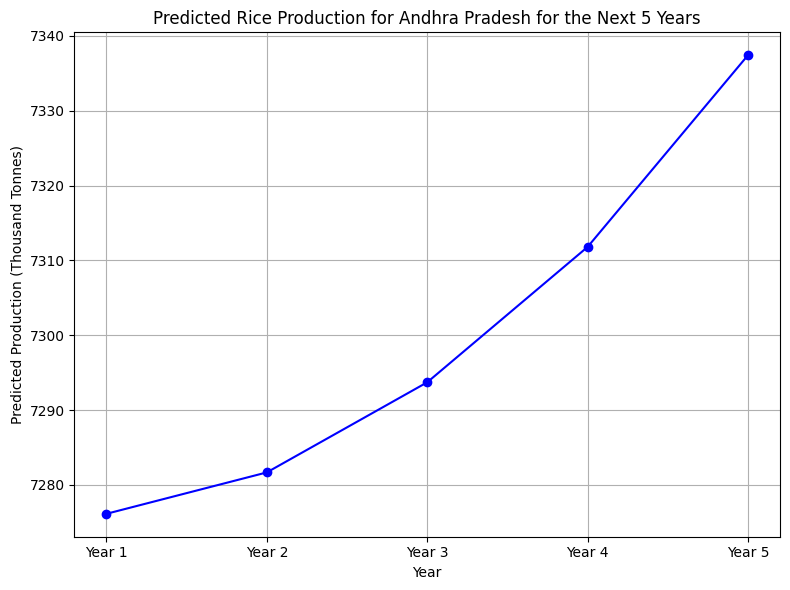

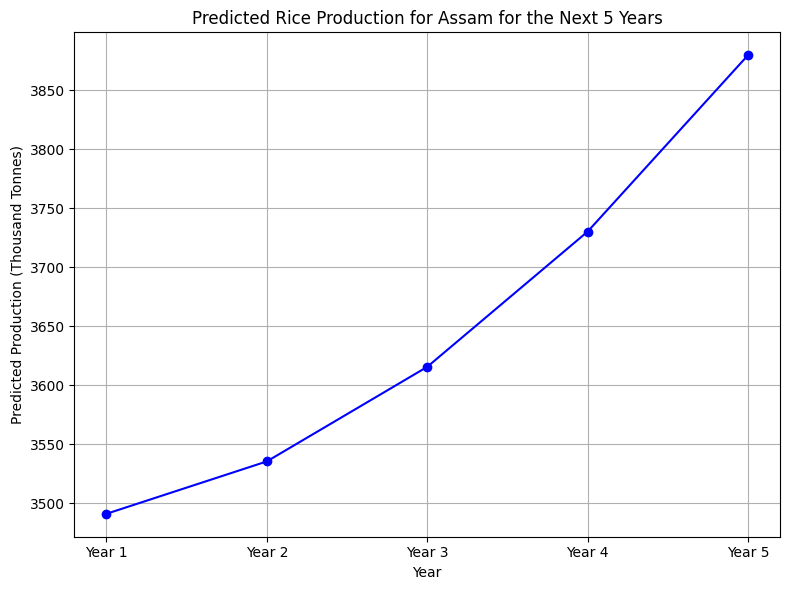

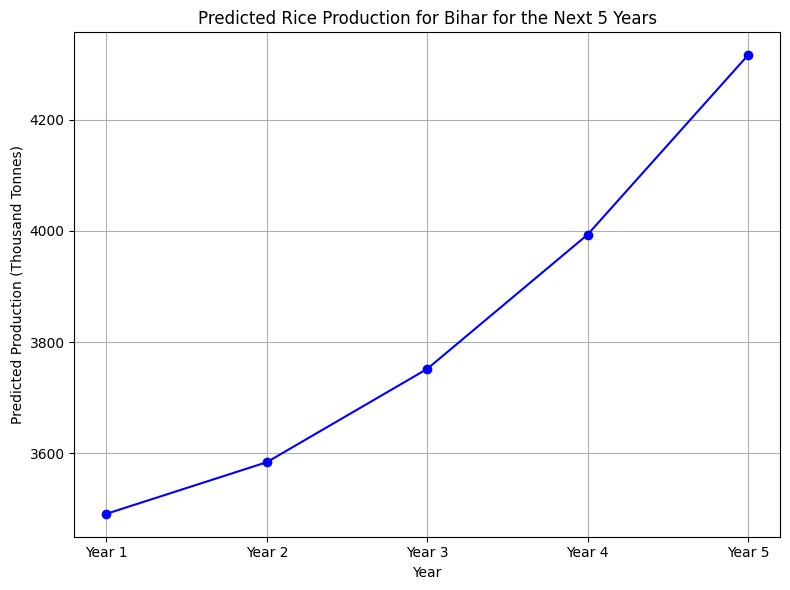

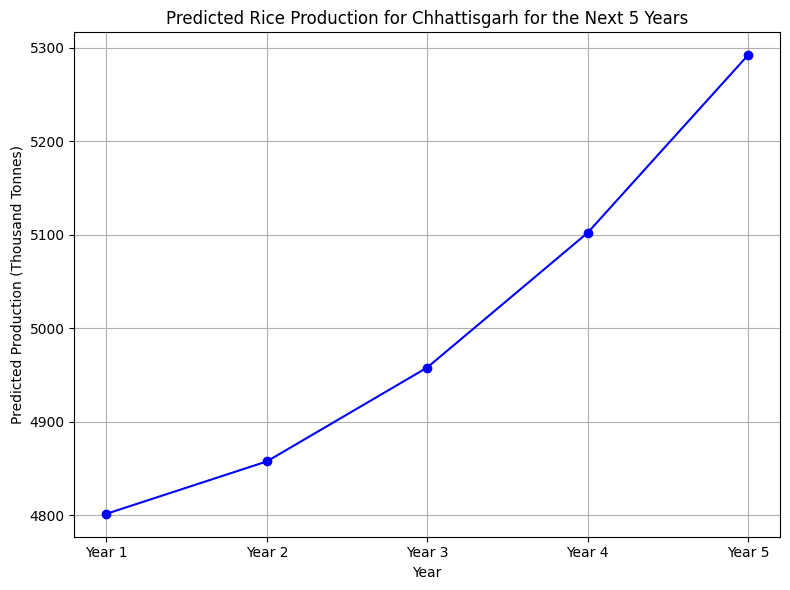

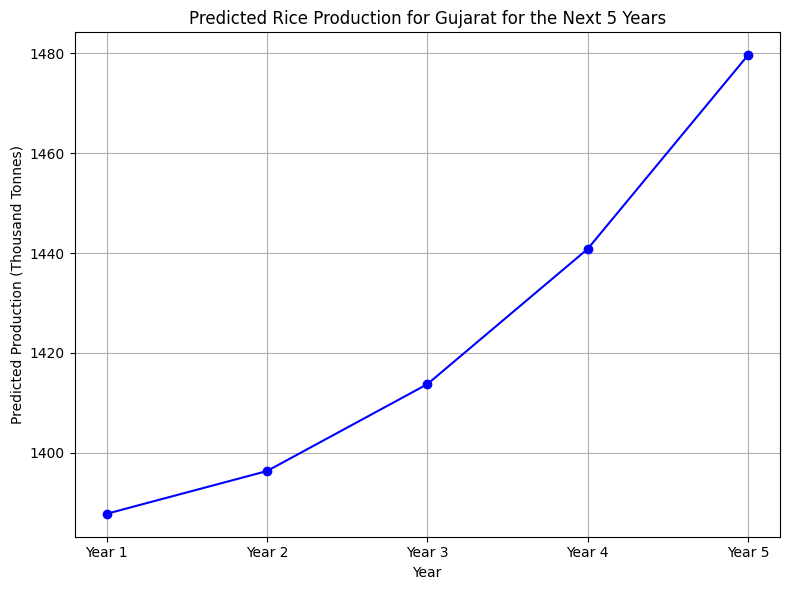

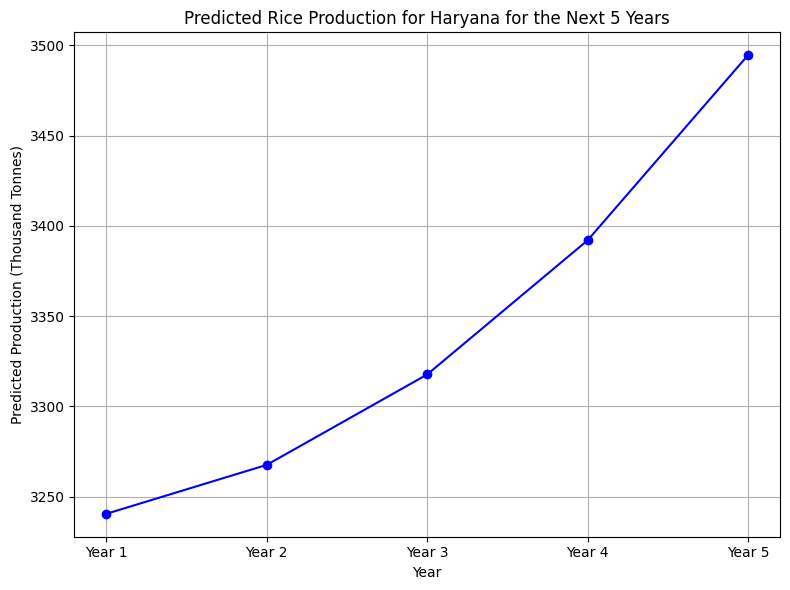

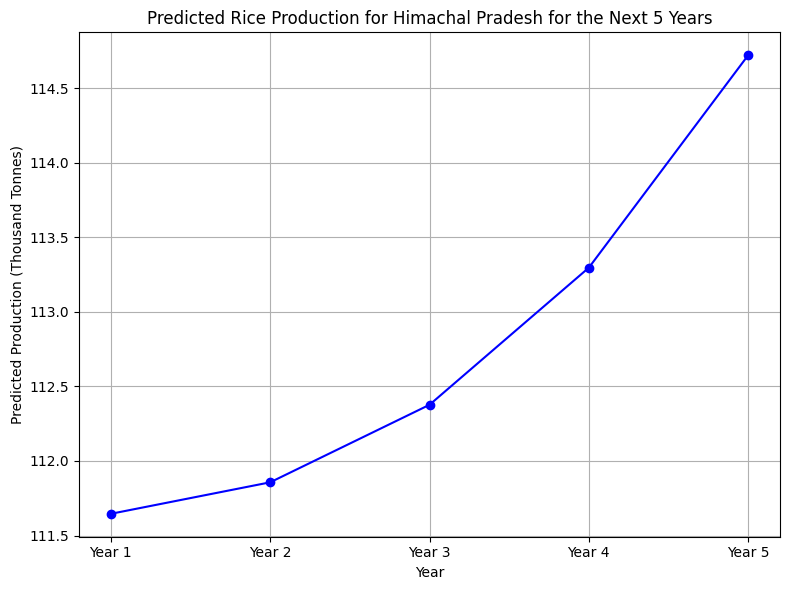

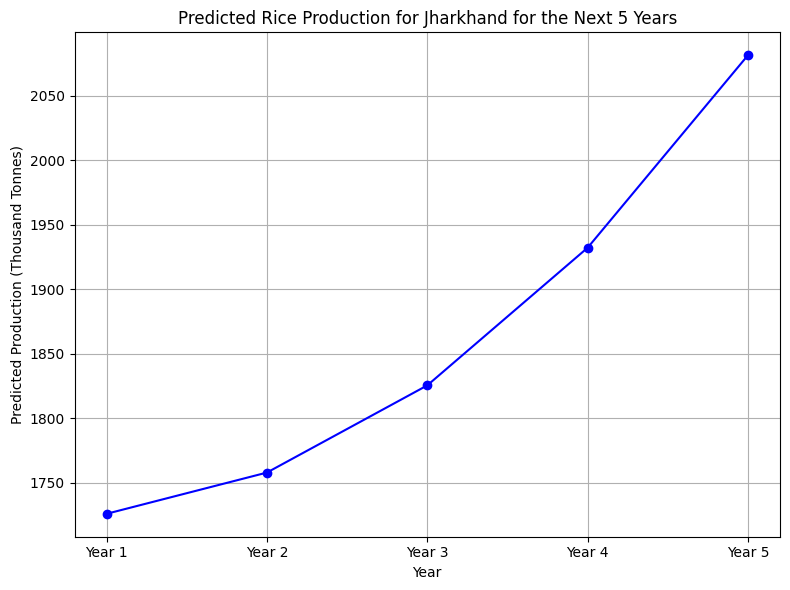

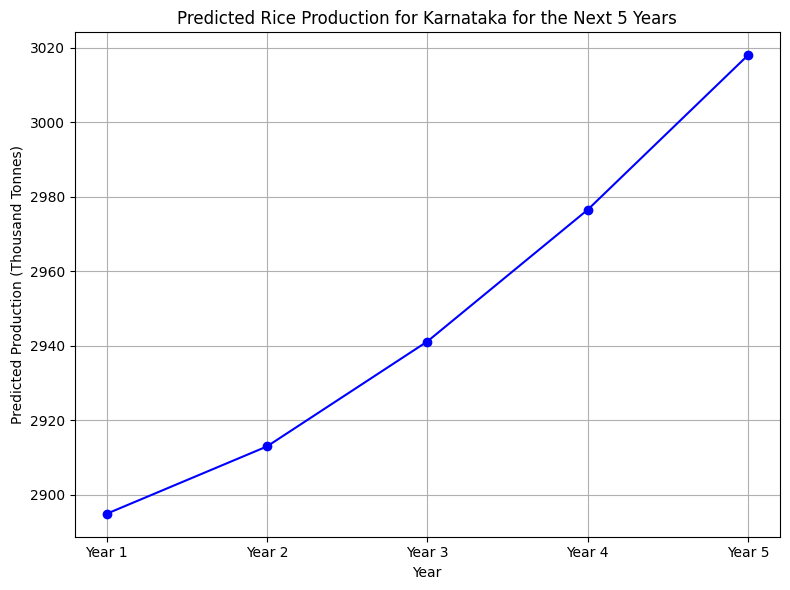

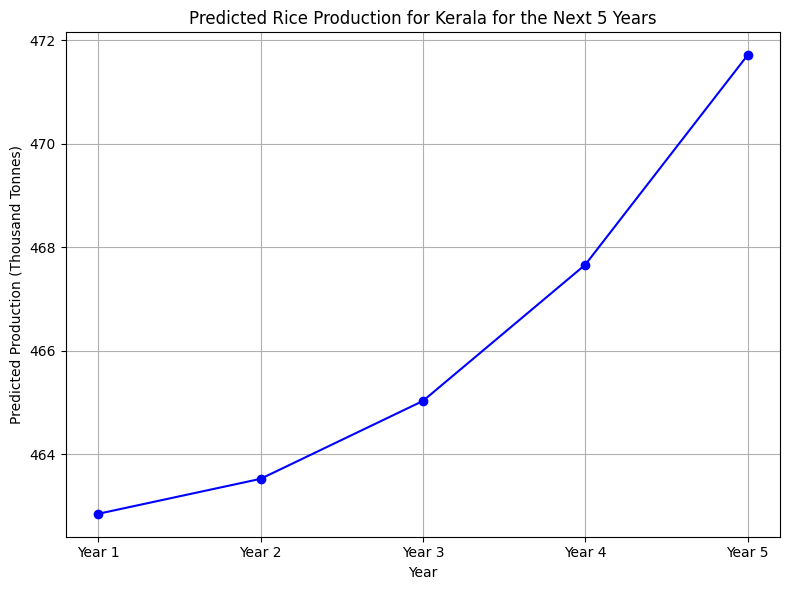

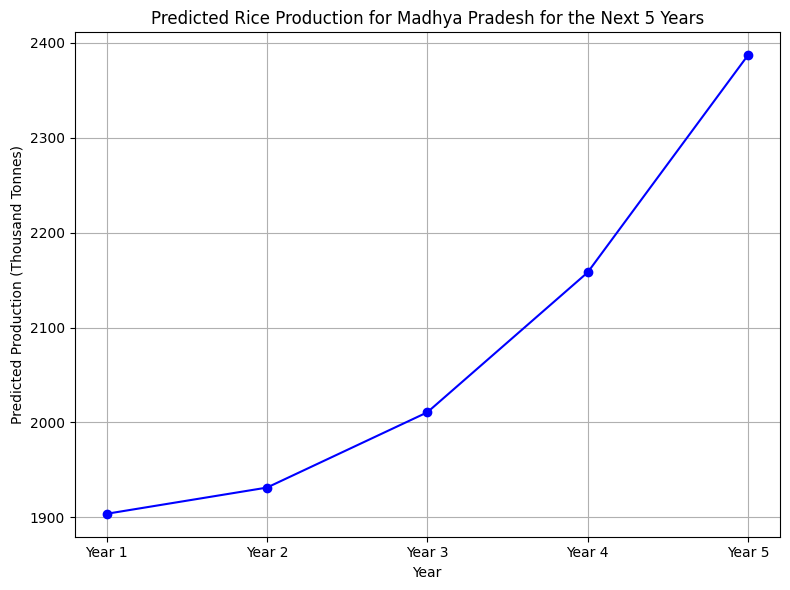

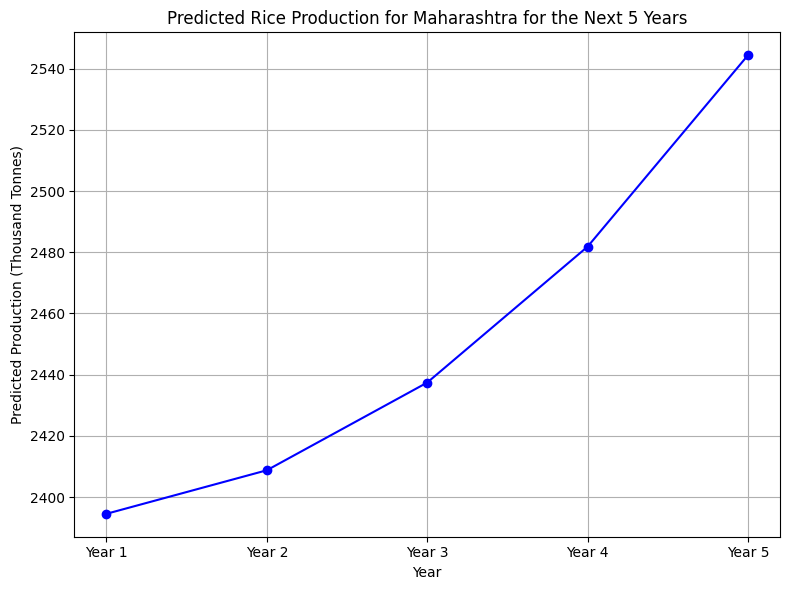

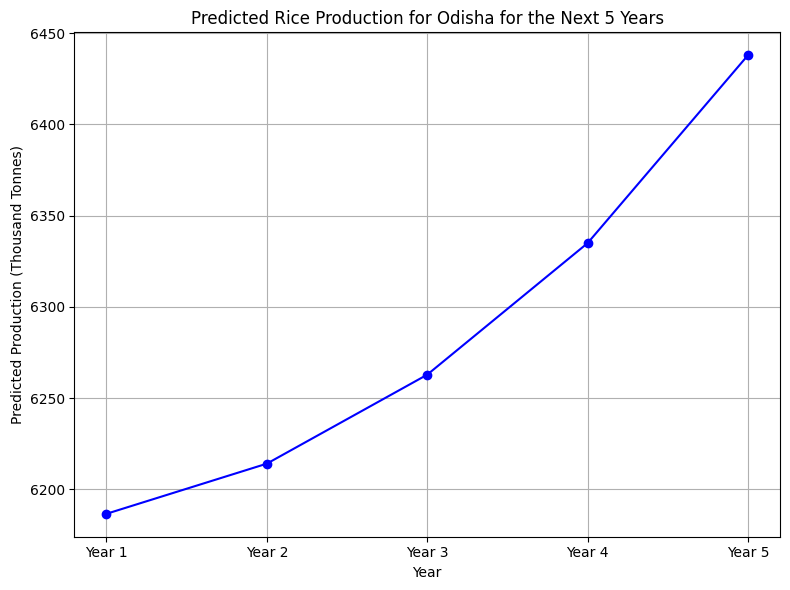

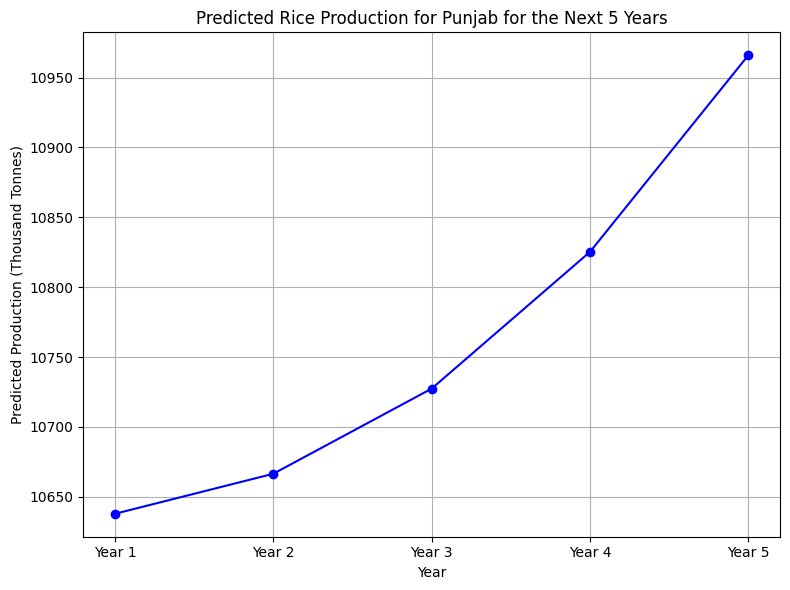

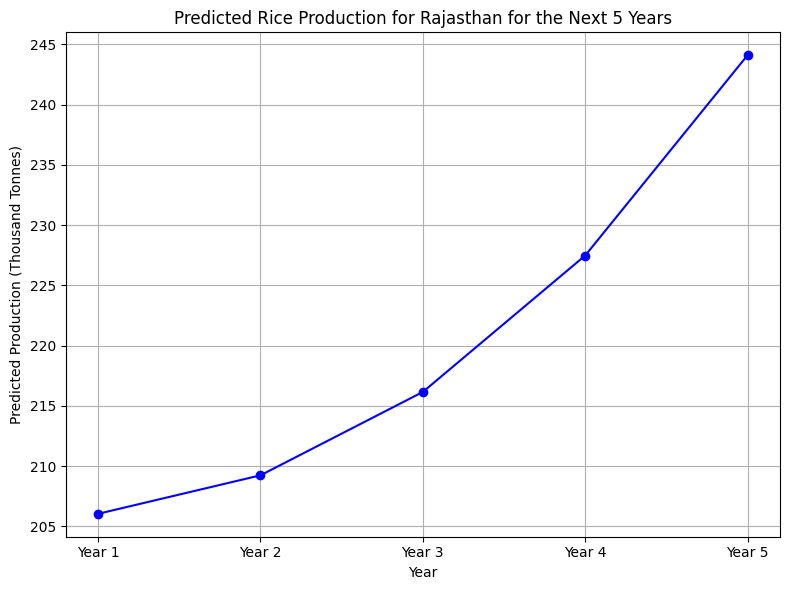

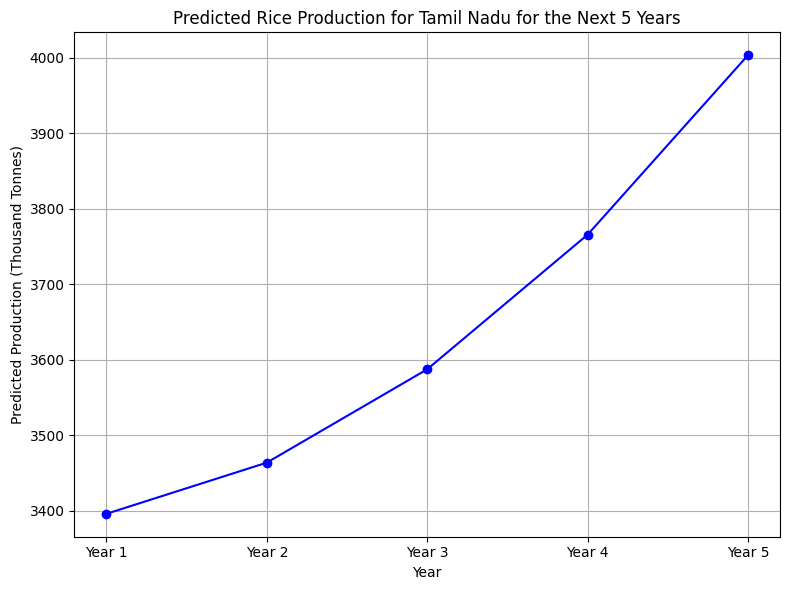

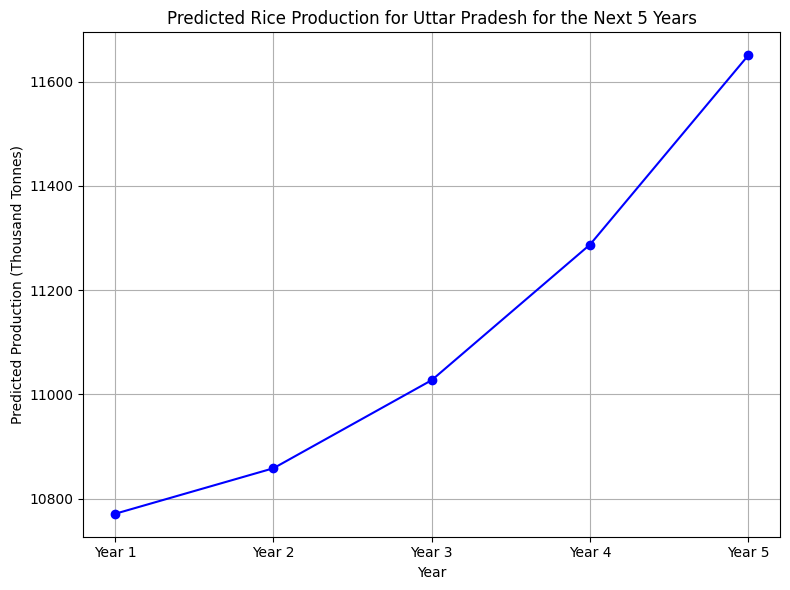

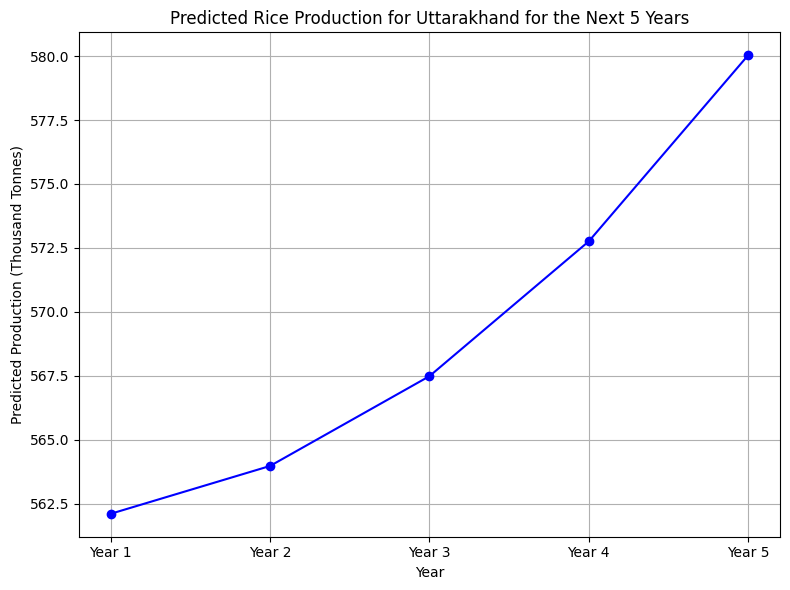

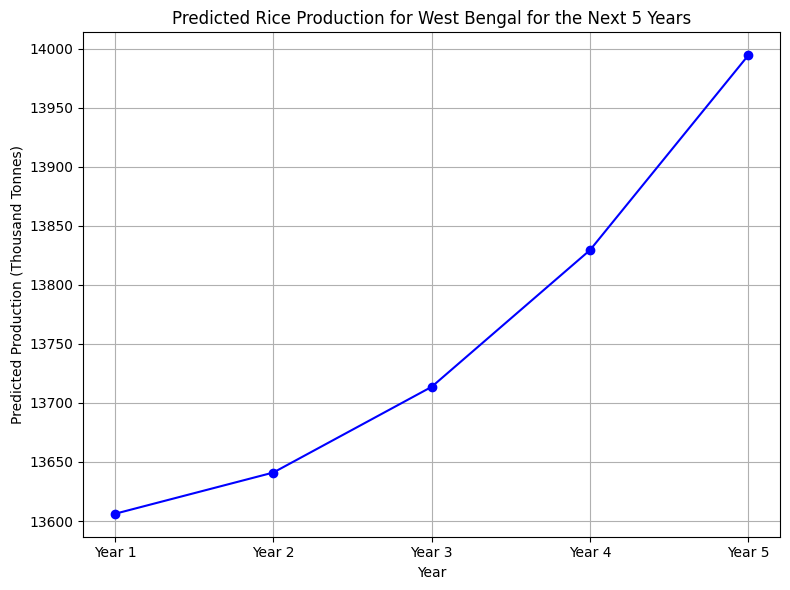

In [54]:
# Plotting separate graphs for each state/union territory
for state in predicted_production_df.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(predicted_production_df.index, predicted_production_df[state], marker='o', linestyle='-', color='b')
    plt.title(f'Predicted Rice Production for {state} for the Next 5 Years')
    plt.xlabel('Year')
    plt.ylabel('Predicted Production (Thousand Tonnes)')
    plt.xticks(range(len(predicted_production_df.index)), [f'Year {i+1}' for i in range(len(predicted_production_df.index))])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


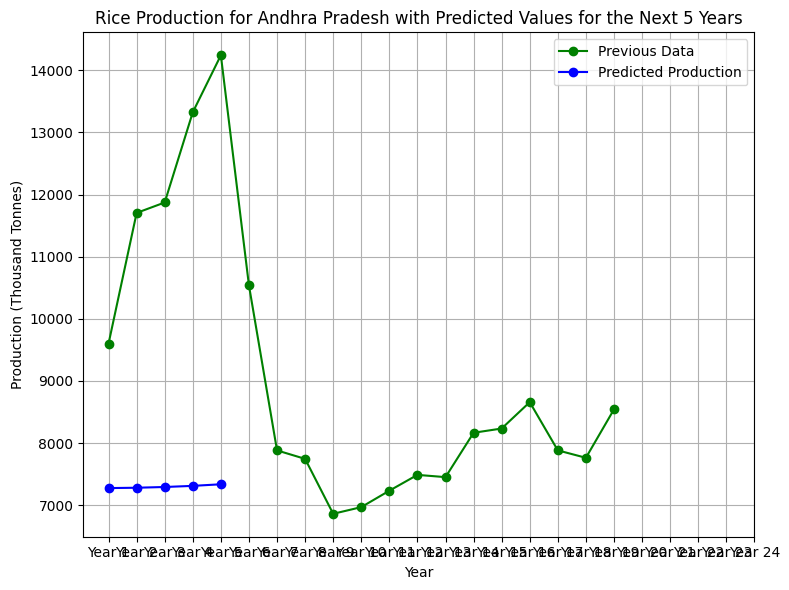

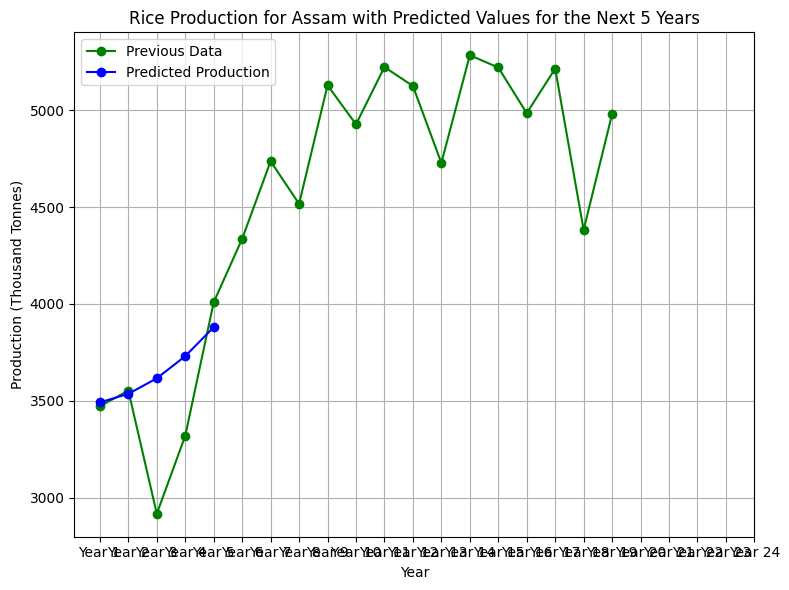

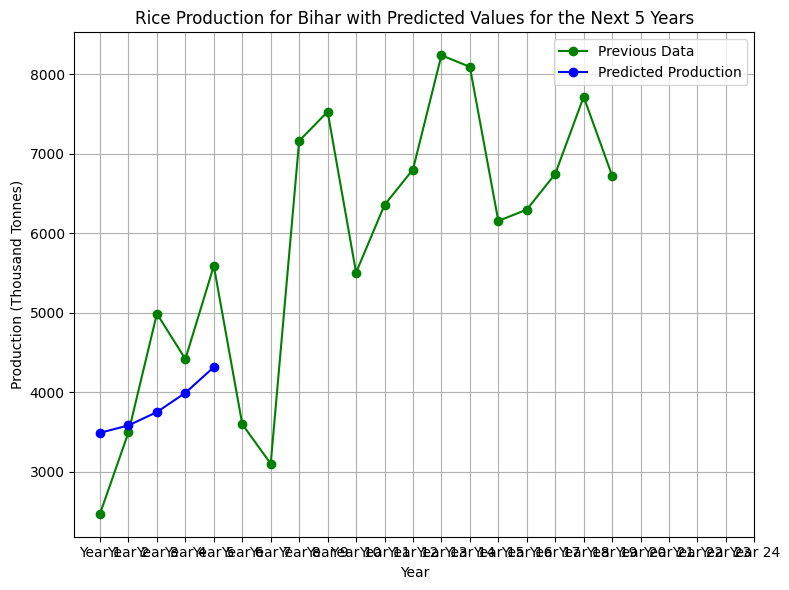

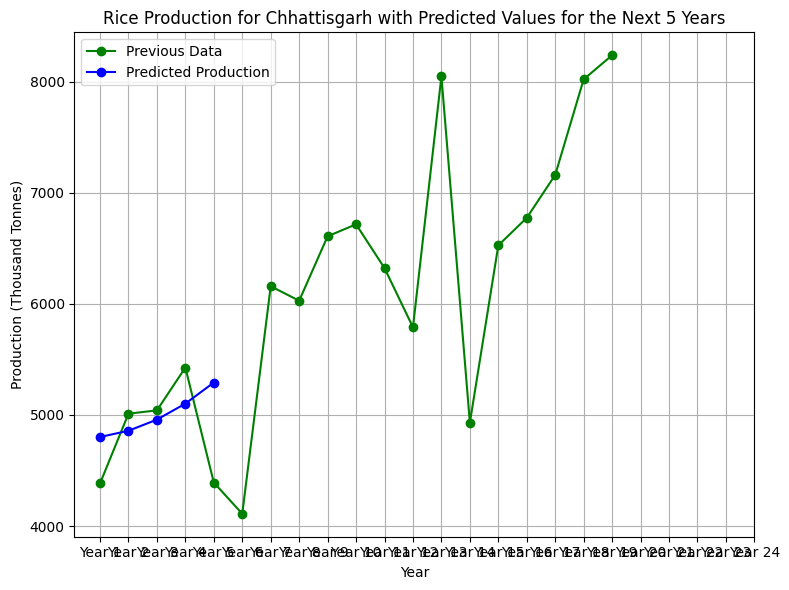

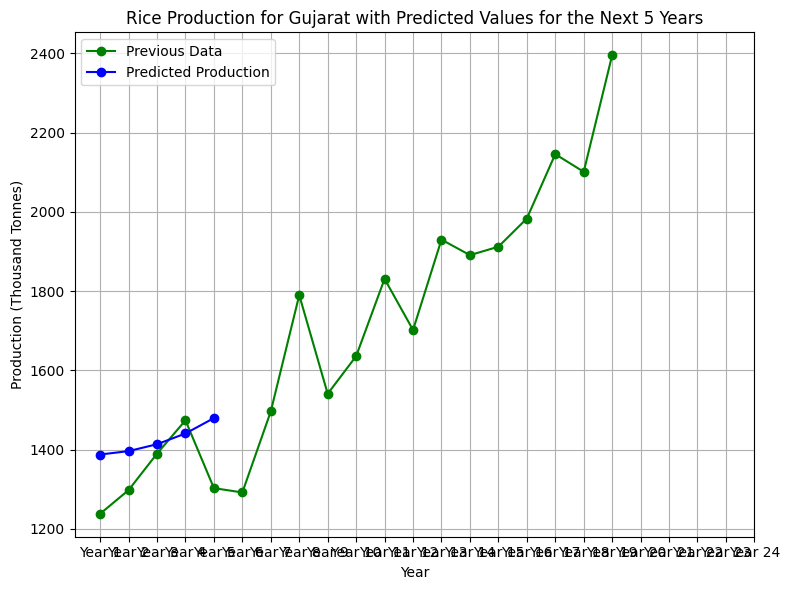

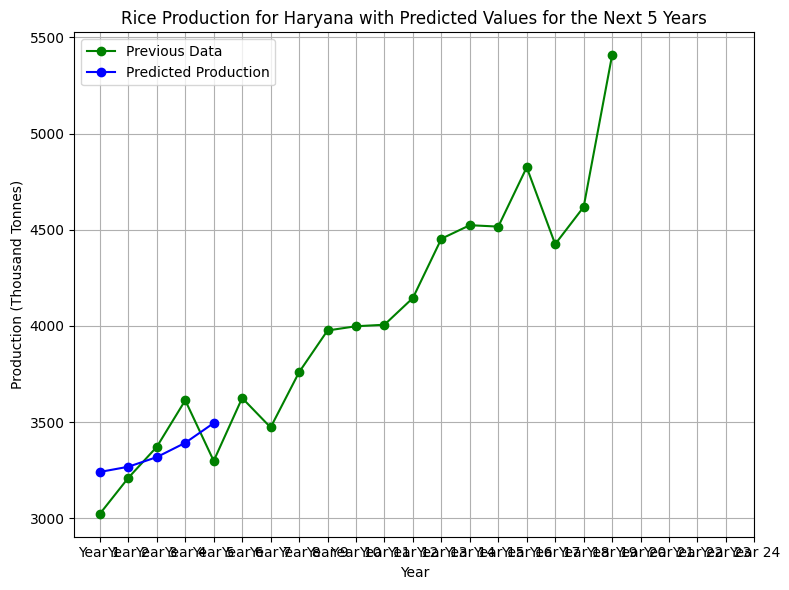

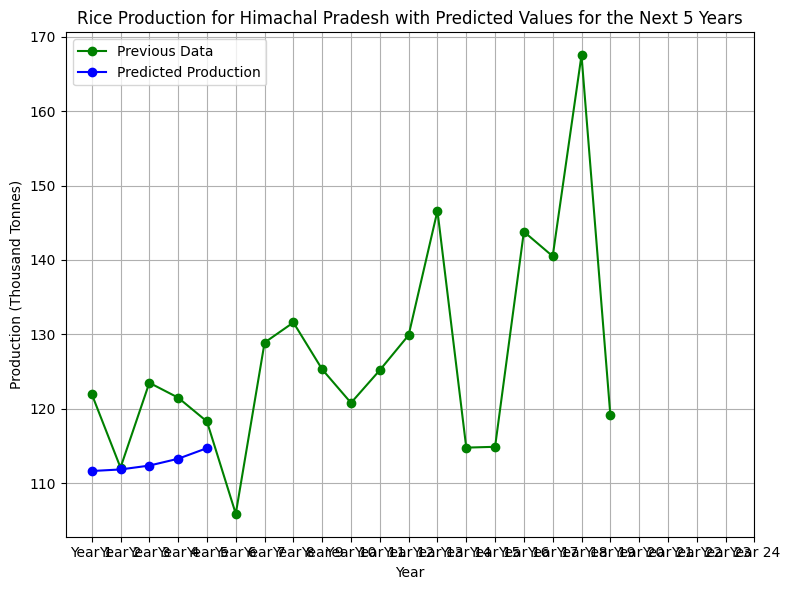

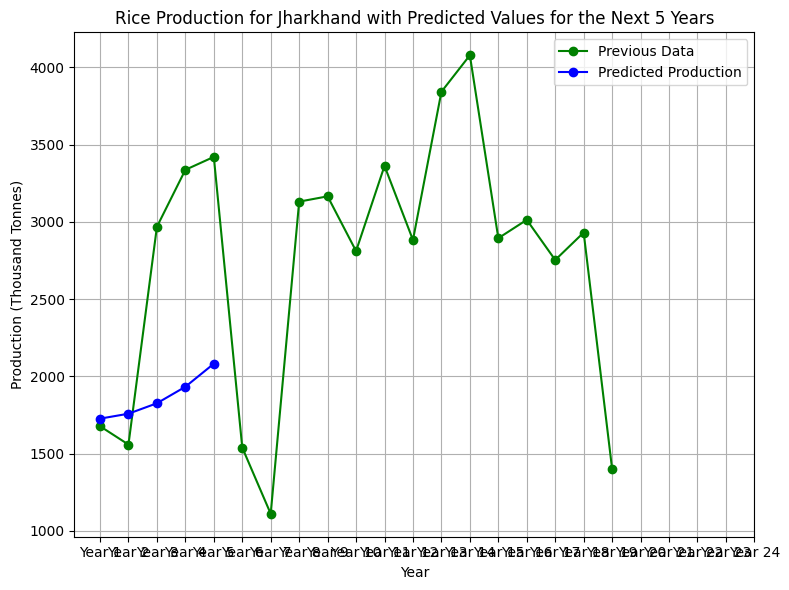

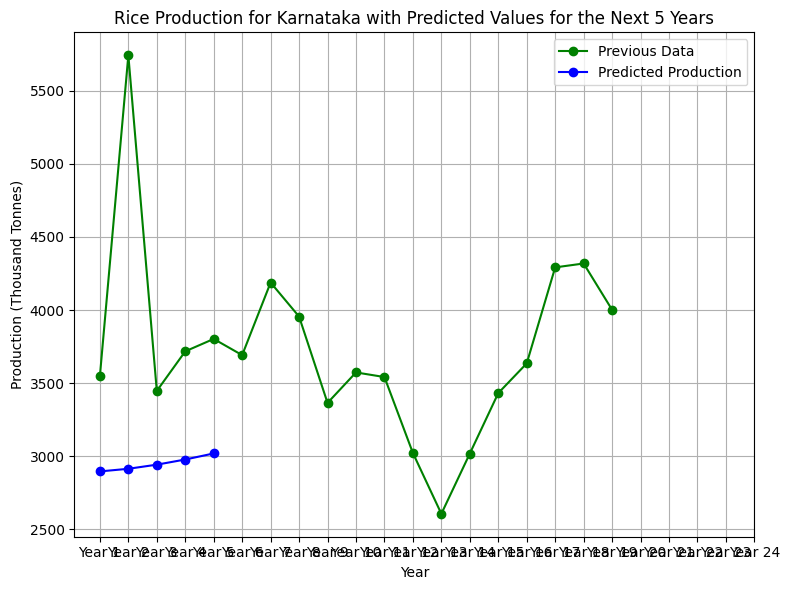

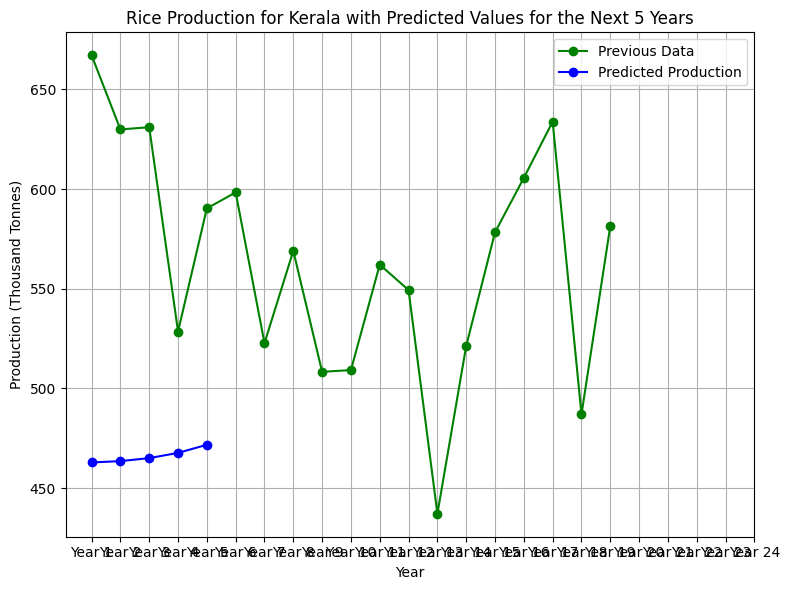

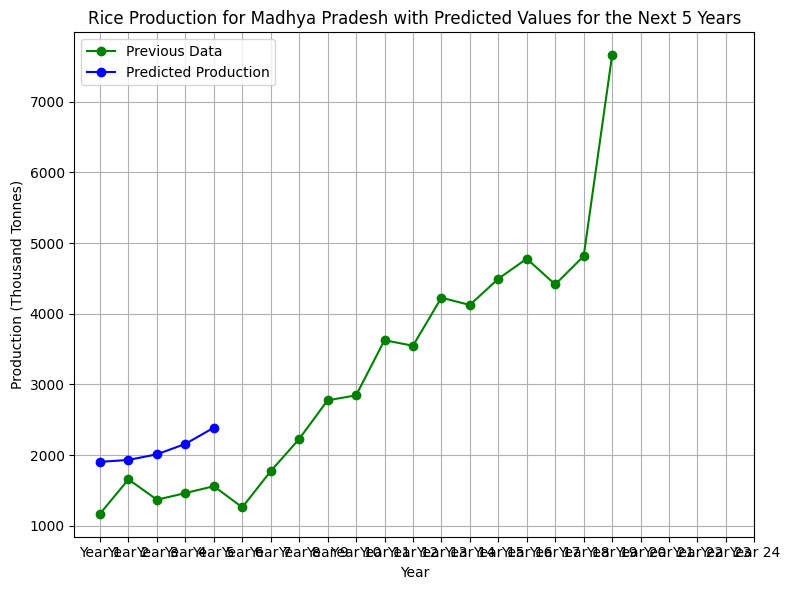

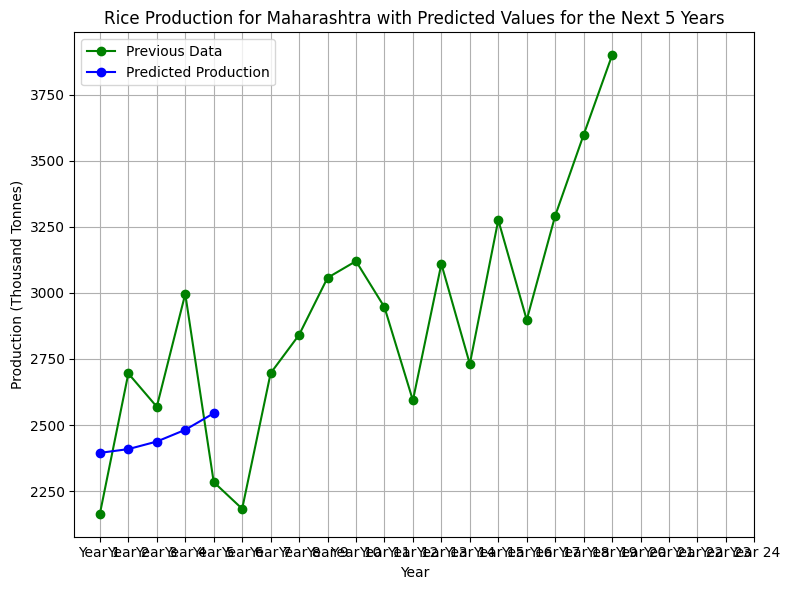

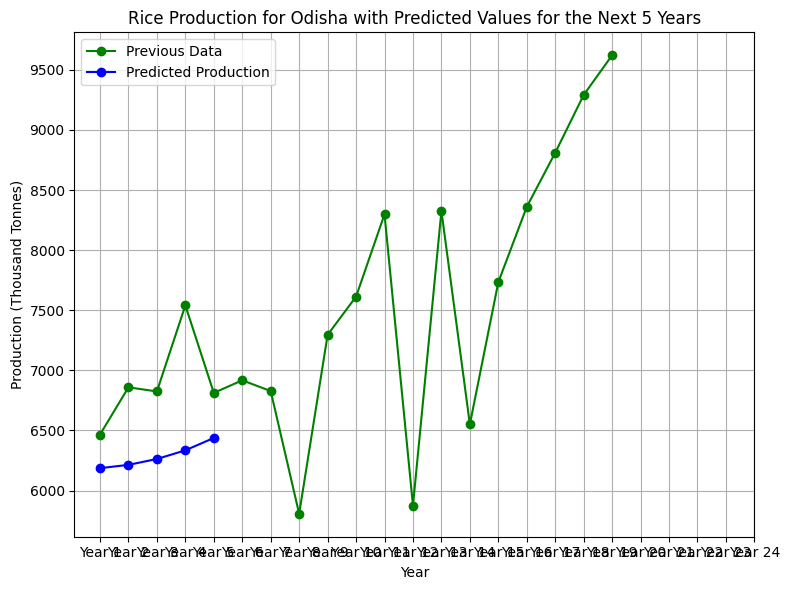

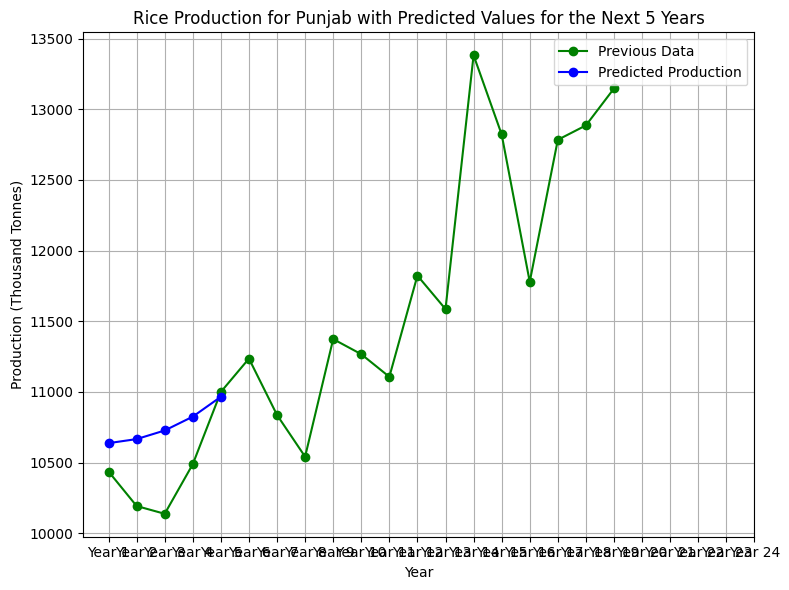

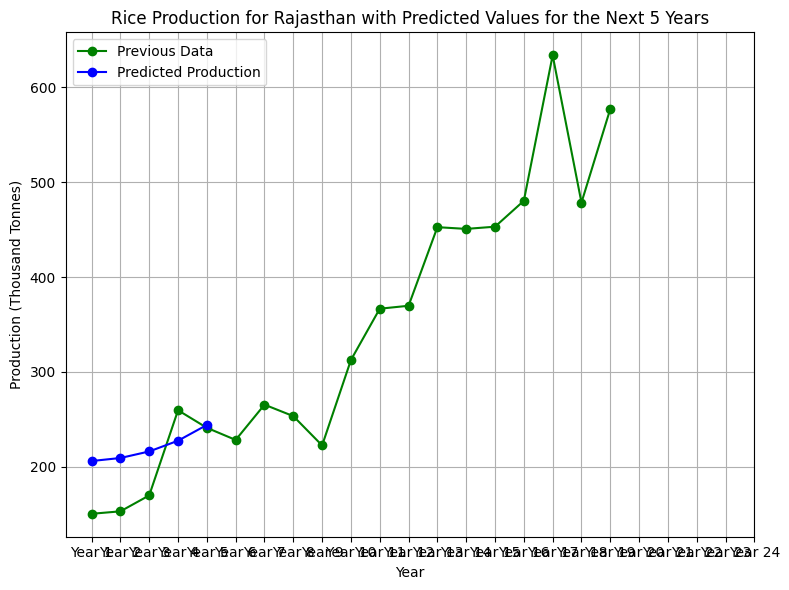

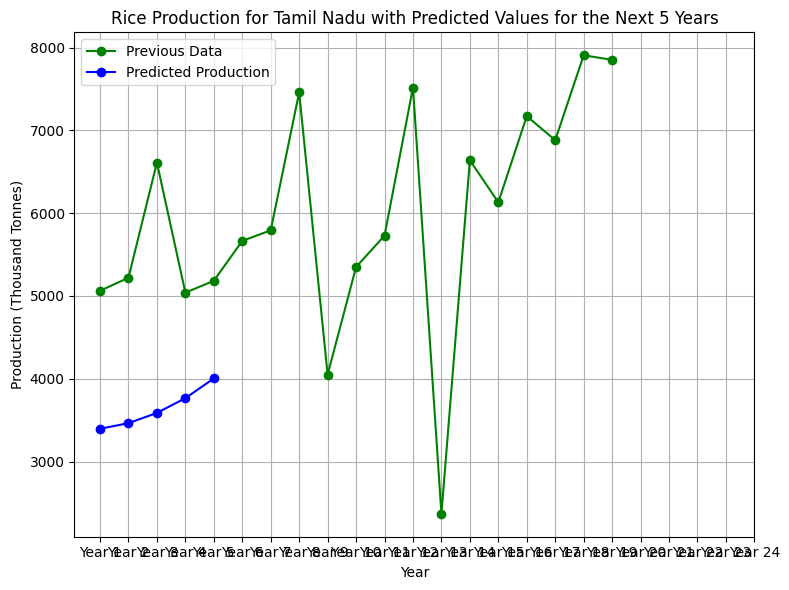

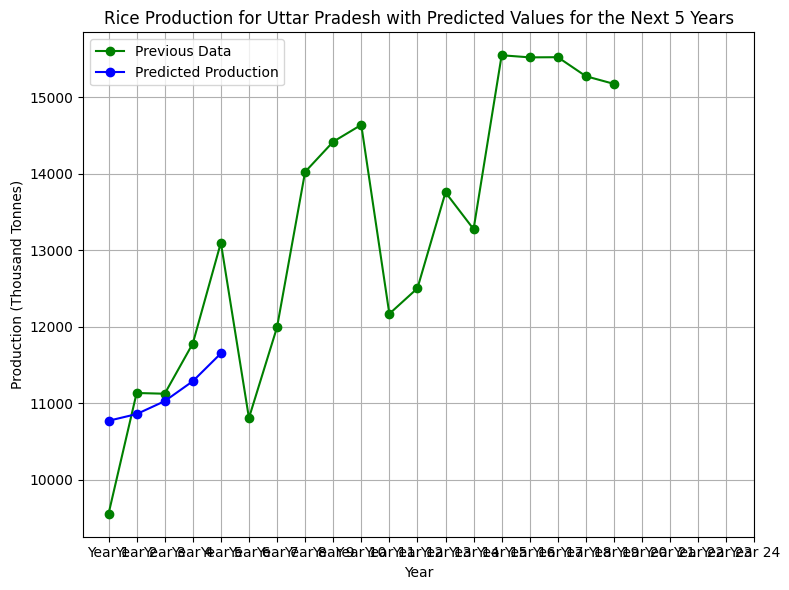

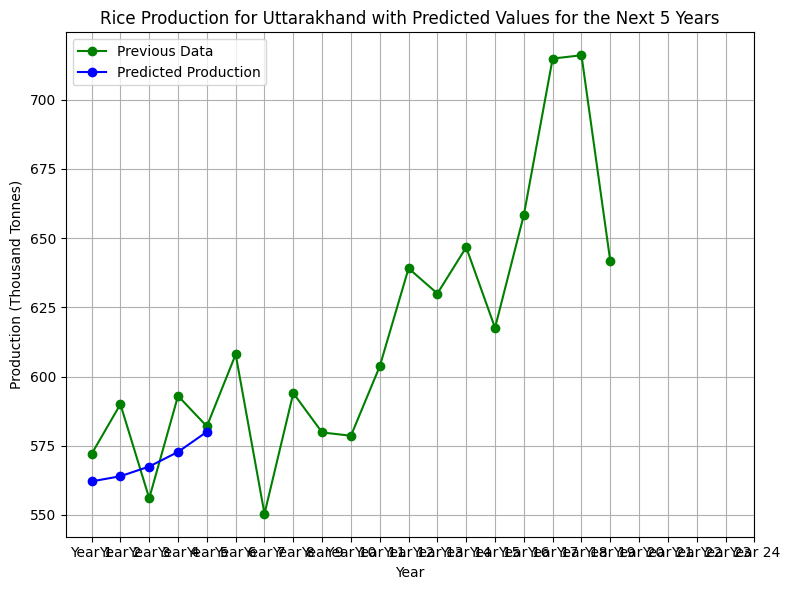

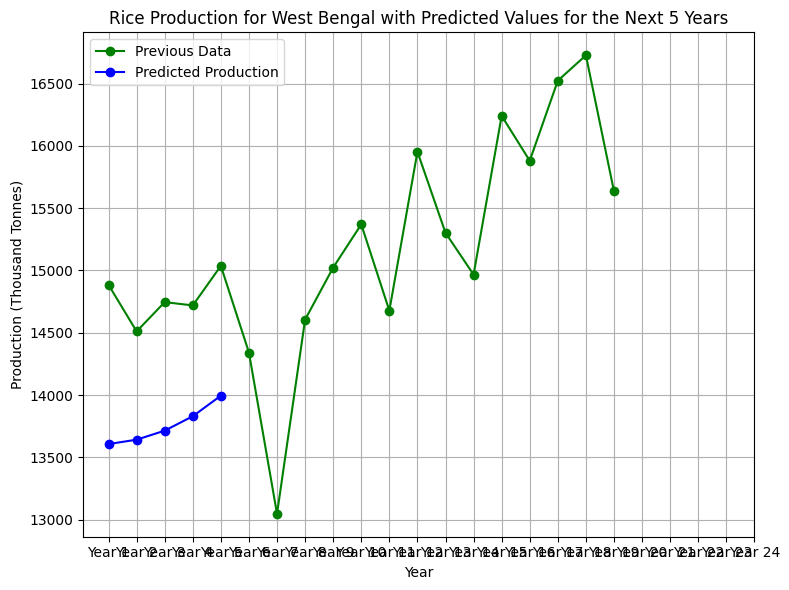

In [57]:
# Plotting separate graphs for each state/union territory
for state in predicted_production_df.columns:
    plt.figure(figsize=(8, 6))

    # Plotting previous data
    plt.plot(numeric_df.index, numeric_df[state], marker='o', linestyle='-', color='g', label='Previous Data')

    # Plotting predicted production
    plt.plot(predicted_production_df.index, predicted_production_df[state], marker='o', linestyle='-', color='b', label='Predicted Production')

    plt.title(f'Rice Production for {state} with Predicted Values for the Next 5 Years')
    plt.xlabel('Year')
    plt.ylabel('Production (Thousand Tonnes)')
    plt.xticks(range(len(predicted_production_df.index) + len(numeric_df.index)),
               [f'Year {i+1}' for i in range(len(predicted_production_df.index) + len(numeric_df.index))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [58]:
# Merge the predicted_production_df with full_df
full_predicted_df = pd.concat([full_df, predicted_production_df])
full_predicted_df

State/Union Territory,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,NCT of Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
2004-05,9601.0,135.0,3470.7,2472.2,4383.3,14.3,145.2,1238.2,3023.0,122.0,...,65.7,10437.0,150.4,21.6,5062.2,NaN,545.1,9555.6,572.0,14884.8
2005-06,11704.0,146.2,3552.5,3495.5,5011.6,24.0,147.3,1298.0,3210.0,112.1,...,59.9,10193.0,153.0,21.5,5220.0,NaN,552.9,11133.7,590.0,14510.8
2006-07,11872.0,146.2,2916.0,4989.3,5041.4,31.1,130.3,1390.0,3371.0,123.5,...,59.9,10138.0,169.8,21.5,6610.6,NaN,620.5,11124.0,556.0,14745.9
2007-08,13324.0,158.1,3319.0,4418.1,5426.6,31.4,121.6,1474.0,3613.0,121.5,...,53.4,10489.0,259.6,22.9,5040.2,NaN,624.6,11780.0,593.0,14719.5
2008-09,14241.0,163.9,4008.5,5590.3,4391.8,31.4,123.3,1303.0,3298.0,118.3,...,50.8,11000.0,241.1,21.7,5182.7,NaN,627.1,13097.0,582.0,15037.3
2009-10,10538.0,215.8,4335.9,3599.3,4110.4,19.3,100.6,1292.0,3625.0,105.9,...,52.4,11236.0,228.3,24.3,5665.2,NaN,640.0,10807.1,608.0,14340.7
2010-11,7882.4,234.0,4736.6,3102.1,6159.0,19.6,115.0,1496.6,3472.0,128.9,...,52.0,10837.0,265.5,21.0,5792.4,6535.6,702.5,11992.0,550.4,13045.9
2011-12,7746.2,255.0,4516.3,7162.6,6028.4,19.8,121.8,1790.0,3759.0,131.6,...,42.1,10542.0,253.4,20.9,7458.7,5148.8,718.3,14022.0,594.0,14605.8
2012-13,6862.4,263.0,5128.5,7529.3,6608.8,19.7,122.8,1541.0,3976.0,125.3,...,46.5,11374.0,222.5,21.3,4049.9,4647.6,713.2,14416.0,579.8,15023.7
2013-14,6969.7,276.2,4927.1,5505.8,6716.4,29.6,126.5,1636.0,3998.0,120.8,...,49.8,11267.0,312.6,20.3,5349.8,5755.0,711.8,14636.0,578.6,15370.7


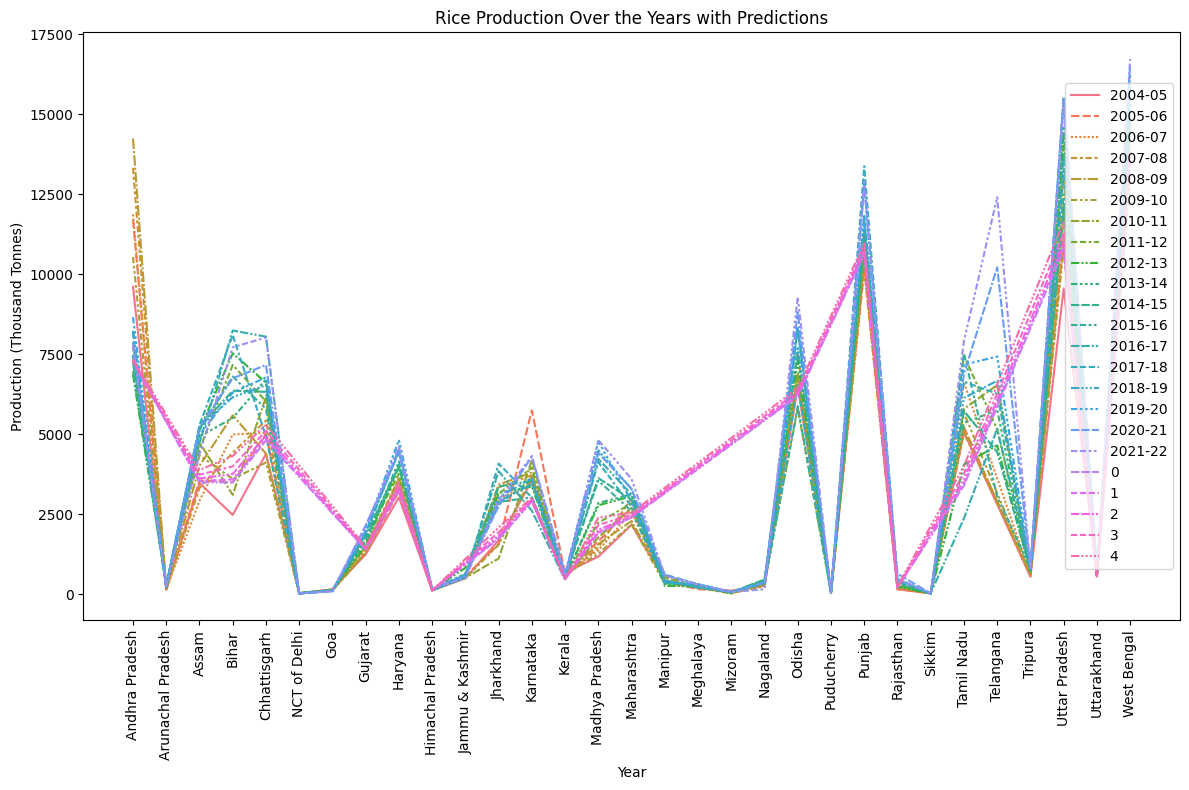

In [59]:
# Plotting the merged DataFrame
plt.figure(figsize=(12, 8))
sns.lineplot(data=full_predicted_df.T)
plt.title('Rice Production Over the Years with Predictions')
plt.xlabel('Year')
plt.ylabel('Production (Thousand Tonnes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [66]:
years = full_df.index.str.split('-').str[0].astype(int)

# Create a list of timestamps with the format 'YYYY-01-01'
timestamps = pd.to_datetime(years.astype(str) + '-01-01')

# Create a range of 5 periods starting from the last index date with a frequency of 1 year
predicted_timestamps = pd.date_range(start=timestamps[-1], periods=5, freq='Y')

# Set the index of the predicted_production_df to these timestamps
predicted_production_df.index = predicted_timestamps

# Concatenate predicted_production_df with the original full_df
full_predicted_df = pd.concat([full_df, predicted_production_df])

# Print the updated DataFrame
full_predicted_df

State/Union Territory,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,NCT of Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
2004-05,9601.0,135.0,3470.7,2472.2,4383.3,14.3,145.2,1238.2,3023.0,122.0,...,65.7,10437.0,150.4,21.6,5062.2,NaN,545.1,9555.6,572.0,14884.8
2005-06,11704.0,146.2,3552.5,3495.5,5011.6,24.0,147.3,1298.0,3210.0,112.1,...,59.9,10193.0,153.0,21.5,5220.0,NaN,552.9,11133.7,590.0,14510.8
2006-07,11872.0,146.2,2916.0,4989.3,5041.4,31.1,130.3,1390.0,3371.0,123.5,...,59.9,10138.0,169.8,21.5,6610.6,NaN,620.5,11124.0,556.0,14745.9
2007-08,13324.0,158.1,3319.0,4418.1,5426.6,31.4,121.6,1474.0,3613.0,121.5,...,53.4,10489.0,259.6,22.9,5040.2,NaN,624.6,11780.0,593.0,14719.5
2008-09,14241.0,163.9,4008.5,5590.3,4391.8,31.4,123.3,1303.0,3298.0,118.3,...,50.8,11000.0,241.1,21.7,5182.7,NaN,627.1,13097.0,582.0,15037.3
2009-10,10538.0,215.8,4335.9,3599.3,4110.4,19.3,100.6,1292.0,3625.0,105.9,...,52.4,11236.0,228.3,24.3,5665.2,NaN,640.0,10807.1,608.0,14340.7
2010-11,7882.4,234.0,4736.6,3102.1,6159.0,19.6,115.0,1496.6,3472.0,128.9,...,52.0,10837.0,265.5,21.0,5792.4,6535.6,702.5,11992.0,550.4,13045.9
2011-12,7746.2,255.0,4516.3,7162.6,6028.4,19.8,121.8,1790.0,3759.0,131.6,...,42.1,10542.0,253.4,20.9,7458.7,5148.8,718.3,14022.0,594.0,14605.8
2012-13,6862.4,263.0,5128.5,7529.3,6608.8,19.7,122.8,1541.0,3976.0,125.3,...,46.5,11374.0,222.5,21.3,4049.9,4647.6,713.2,14416.0,579.8,15023.7
2013-14,6969.7,276.2,4927.1,5505.8,6716.4,29.6,126.5,1636.0,3998.0,120.8,...,49.8,11267.0,312.6,20.3,5349.8,5755.0,711.8,14636.0,578.6,15370.7
